In [1]:
import pandas as pd
import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#from dask_searchcv import GridSearchCV
#from dask_searchcv import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

In [2]:


df = pd.read_csv('./data/clean.csv')
df = df.dropna()

df.sample(5)


,loan_type_str_VA-guarenteed,loan_type_str_Conventional,loan_type_str_FHA-Insured,loan_type_str_FSA/RHS,property_type_str_1 to 4 Family - non manufactured,property_type_str_Manufactured Housing,property_type_str_Multifamily,loan_purpose_str_Home purchase,loan_purpose_str_Refinancing,loan_purpose_str_Home improvement,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
357211,0,0,1,0,1,0,0,1,0,0,...,0.428571,0.608153,0.09967,0.674456,1.0,0.956938,0.589286,2102,0,1
433083,0,1,0,0,1,0,0,0,0,1,...,0.514286,-0.399192,0.05197,-0.120166,1.0,-0.080144,0.001984,1308,1,0
297758,0,1,0,0,1,0,0,0,1,0,...,1.528571,0.189130,0.04788,1.489501,1.0,0.551435,-0.066468,2058,0,1
168284,0,1,0,0,1,0,0,0,1,0,...,0.457143,0.393316,0.18849,-0.193790,1.0,0.479665,0.226190,2372,1,0
38286,0,1,0,0,1,0,0,1,0,0,...,0.785714,-0.313625,0.25863,0.320294,1.0,-1.013158,-1.680556,969,0,0


In [3]:
# reduced features
'''
[(0.0966, 'lender'), (0.0963, 'applicant_income'), (0.0949, 'loan_amount'), (0.0848, 'minority_population_pct'), (0.0825, 'ffiecmedian_family_income'), (0.0777, 'population'), (0.0766, 'number_of_owner-occupied_units'), (0.0762, 'number_of_1_to_4_family_units'), (0.0572, 'county_code'),
(0.0544, 'loan_purpose'), (0.0489, 'msa_md'), (0.0445, 'state_code'), (0.0383, 'tract_to_msa_md_income_pct'), (0.0148, 'applicant_race'), (0.0133, 'loan_type'), (0.0126, 'property_type'), (0.0106, 'co_applicant'), (0.0105, 'applicant_ethnicity'), (0.0094, 'preapproval')]
'''
# reduced_feature_df = df[['accepted','lender','applicant_income', 'loan_amount', 'minority_population_pct','ffiecmedian_family_income', 'population', 'number_of_owner-occupied_units','number_of_1_to_4_family_units', 'loan_purpose','co_applicant', 'loan_type'  ]]

reduced_feature_df =  df #df[['accepted','applicant_income', 'loan_amount', 'state_code','ffiecmedian_family_income',  'loan_type'  ]]

reduced_feature_df.sample(5)

,loan_type_str_VA-guarenteed,loan_type_str_Conventional,loan_type_str_FHA-Insured,loan_type_str_FSA/RHS,property_type_str_1 to 4 Family - non manufactured,property_type_str_Manufactured Housing,property_type_str_Multifamily,loan_purpose_str_Home purchase,loan_purpose_str_Refinancing,loan_purpose_str_Home improvement,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
4991,0,1,0,0,1,0,0,0,1,0,...,-0.057143,0.950790,0.92667,1.341997,1.00000,0.433014,0.342262,551,1,1
189766,0,1,0,0,1,0,0,0,1,0,...,0.657143,0.336026,0.12311,0.964277,0.78074,0.209330,0.378968,5605,1,0
448074,0,1,0,0,0,1,0,0,1,0,...,0.085714,-0.471539,0.99516,2.533995,0.87860,-0.276316,-0.515873,4701,0,0
396983,0,1,0,0,1,0,0,0,1,0,...,0.314286,0.051781,0.05168,0.788796,1.00000,0.204545,0.298611,6137,1,0
33596,0,1,0,0,1,0,0,0,1,0,...,-0.314286,0.040764,0.94193,-0.275544,0.45246,-0.613636,-1.283730,6240,0,0


In [4]:
# split up the data into labels and features
labels = reduced_feature_df['accepted']
features = reduced_feature_df.drop(columns=['accepted'])

# split test / train data
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import datetime

# first pass - standard 50/50 split
train, test, train_labels, test_labels = train_test_split(features,
                                                          labels,
                                                          test_size=0.30,
                                                          random_state=123)

In [5]:

'''
# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(train, train_labels)
preds = gnb.predict(test)

# Evaluate accuracy
print('accuracy of model is:',accuracy_score(test_labels, preds))
'''
def export_submission(predictions, df, export_label_column):
    df = pd.DataFrame({export_label_column: predictions})
    df['row_id'] = df.index

    df_export = pd.DataFrame({'row_id':df['row_id'], export_label_column:df[export_label_column]})
    
    currentDT = datetime.datetime.now()
    #export_path = str(currentDT.strftime("%Y-%m-%d %H:%M:%S")) + ".csv"
    #export_path = str(export_path.replace(" ", "_"))
    export_path = "output.csv"
    df_export.to_csv(export_path, index=False)
    print('exporting results to: ', export_path, '# records ', len(df_export))
    
# export_submission(preds, df, 'accepted')

In [6]:
from sklearn.ensemble import RandomForestClassifier 
import matplotlib.pyplot as plt
import numpy as np

# create a new classifiser
rfc = RandomForestClassifier()
# Train the model
model2 = rfc.fit(train, train_labels)
preds2 = rfc.predict(test)
col_names = reduced_feature_df.columns.values




C:\Users\BenMcC\AppData\Local\conda\conda\envs\mortgage-classifier-capstone\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy of model2 is: 0.6353582755919286
Features sorted by their score:
[(0.0756, 'applicant_income'), (0.0691, 'loan_amount'), (0.0631, 'lender'), (0.0592, 'minority_population_pct'), (0.0587, 'ffiecmedian_family_income'), (0.0575, 'population'), (0.0572, 'number_of_1_to_4_family_units'), (0.0571, 'number_of_owner-occupied_units'), (0.0309, 'tract_to_msa_md_income_pct'), (0.0287, 'county_code'), (0.0238, 'msa_md'), (0.0222, 'loan_purpose'), (0.0197, 'state_code'), (0.016, 'loan_purpose_str_Home purchase'), (0.0108, 'loan_purpose_str_Refinancing'), (0.0107, 'co_applicant'), (0.0071, 'applicant_race'), (0.0069, 'preapproval'), (0.0065, 'loan_type'), (0.0061, 'applicant_sex'), (0.0061, 'applicant_race_str_White'), (0.0055, 'property_type'), (0.0055, 'applicant_sex_str_Male'), (0.0054, 'loan_purpose_str_Home improvement'), (0.0051, 'preapproval_str_Not Requested'), (0.0051, 'applicant_ethnicity_str_Not Hispanic'), (0.005, 'applicant_sex_str_Female'), (0.0044, 'applicant_race_str_African

In [9]:
print('accuracy of model2 is:',accuracy_score(test_labels, preds2))

print("Features sorted by their score:")
zipped_objs = zip(map(lambda x: round(x, 4), rfc.feature_importances_), col_names)
print( sorted(zipped_objs, reverse=True)[0:15] )

accuracy of model2 is: 0.6353582755919286
Features sorted by their score:


TypeError: 'zip' object is not subscriptable

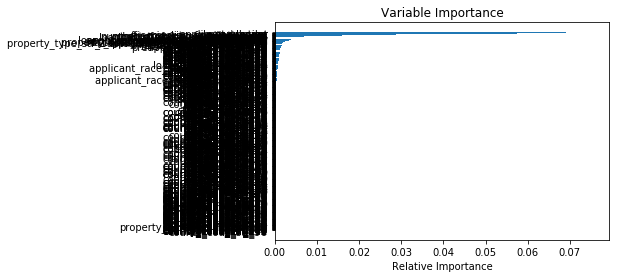

In [7]:
# Isolate feature importances 
importance = rfc.feature_importances_

# Sort the feature importances 
sorted_importances = np.argsort(importance)

# Insert padding
padding = np.arange(len(col_names)-1) + 0.5

# Plot the data
plt.barh(padding, importance[sorted_importances], align='center')

# Customize the plot
plt.yticks(padding, col_names[sorted_importances])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")

# Show the plot
plt.show()

In [8]:
# export the model for use in other notebooks
import pickle

filename = 'RandomForestClassifier_v2.sav'
pickle.dump(model, open(filename, 'wb'))

NameError: name 'model' is not defined

In [ ]:
'''
# build a classifier
clf = RandomForestClassifier(n_estimators=20)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

start = time()
#model2 = rfc.fit(train, train_labels)
random_search.fit(train, train_labels)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
start = time()
grid_search.fit(train, train_labels)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)
'''